<a href="https://colab.research.google.com/github/dongjae-shin/SegrDNN/blob/main/210423_BayesianOpt_Esegr_vs_CN_segrModel%2BSHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 211021 Testing DNN model from HAIL@Handong Global University(+220413)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Ctrl+Alt+D

Mounted at /content/drive


## 1.Installing Package

In [ ]:
!pip install -U keras-tuner==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.3 MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73199 sha256=701f47894aa2c4c7e7e5251681635149349c78e7e2a5bb1f9789493da21cdf4e
  Stored in directory: /root/.cache/pip/wheels/62/84/96/51c62791835c5185b9f66e915e19ae7c20f3d8c40443b3e9fa
Successfully built keras-tuner


## 2.Defining dictionaries

In [ ]:
# Liquid surface tension
# source: Interfacial Phenomena in Metals and Alloys. Addison-Wesley: Reading, MA, 1975.
tension = {
            'Ti':1.650,
            'V': 1.950,
            'Cr':1.590,
            'Mn':1.060,
            'Fe':1.880,
            'Co':1.880,
            'Ni':1.780,
            'Cu':1.300,
            'Zr':1.480,
            'Nb':1.900,
            'Mo':2.250,
            'Tc':2.100,
            'Ru':2.250,
            'Rh':2.000,
            'Pd':1.500,
            'Ag':0.895,
            'Hf':1.630,
            'Ta':2.150,
            'W': 2.400,
            'Re':2.700,
            'Os':2.500,
            'Ir':2.250,
            'Pt':1.800,
            'Au':1.140 }

# Wigner-Seitz radius
# source: J. Mol. Catal. A 1997, 115, 421.
radius = {
            'Ti':3.05,
            'V': 2.82,
            'Cr':2.68,
            'Mn':2.70,
            'Fe':2.66,
            'Co':2.62,
            'Ni':2.60,
            'Cu':2.67,
            'Zr':3.35,
            'Nb':3.07,
            'Mo':2.99,
            'Tc':2.84,
            'Ru':2.79,
            'Rh':2.81,
            'Pd':2.87,
            'Ag':3.01,
            'Hf':3.30,
            'Ta':3.07,
            'W': 2.95,
            'Re':2.87,
            'Os':2.83,
            'Ir':2.84,
            'Pt':2.90,
            'Au':3.00 }

# Electronegativity by Pauling scale
# source: https://en.wikipedia.org/wiki/Electronegativity#Pauling_electronegativity
PEN = {
            'Ti':1.54,
            'V': 1.63,
            'Cr':1.66,
            'Mn':1.55,
            'Fe':1.83,
            'Co':1.88,
            'Ni':1.91,
            'Cu':1.90,
            'Zr':1.33,
            'Nb':1.6,
            'Mo':2.16,
            'Tc':1.9,
            'Ru':2.2,
            'Rh':2.28,
            'Pd':2.2,
            'Ag':1.93,
            'Hf':1.3,
            'Ta':1.5,
            'W': 2.36,
            'Re':1.9,
            'Os':2.2,
            'Ir':2.20,
            'Pt':2.28,
            'Au':2.54 }

# Ionization energy
# source: https://en.wikipedia.org/wiki/Ionization_energies_of_the_elements_(data_page)
IE = {
            'Ti':6.8281,
            'V': 6.7462,
            'Cr':6.7665,
            'Mn':7.43402,
            'Fe':7.9024,
            'Co':7.8810,
            'Ni':7.6398,
            'Cu':7.72638,
            'Zr':6.63390,
            'Nb':6.75885,
            'Mo':7.09243,
            'Tc':7.28,
            'Ru':7.36050,
            'Rh':7.45890,
            'Pd':8.3369,
            'Ag':7.5762,
            'Hf':6.82507,
            'Ta':7.5496,
            'W':7.8640,
            'Re':7.8335,
            'Os':8.4382,
            'Ir':	8.9670,
            'Pt':8.9587,
            'Au':9.2255 }

# Electron affinity (eV)
# source: https://en.wikipedia.org/wiki/Electron_affinity_(data_page)
EA = {
            'Ti':0.07554,
            'V': 0.52766,
            'Cr':0.67584,
            'Mn':-0.5,
            'Fe':0.153236,
            'Co':0.66226,
            'Ni':1.15716,
            'Cu':1.23578,
            'Zr':0.43328,
            'Nb':0.91740,
            'Mo':0.7473,
            'Tc':0.55,
            'Ru':1.04638,
            'Rh':1.14289,
            'Pd':0.56214,
            'Ag':1.30447,
            'Hf':0.1780,
            'Ta':0.323,
            'W': 0.81626,
            'Re':0.060396,
            'Os':1.07780,
            'Ir':1.56436,
            'Pt':2.12510,
            'Au':2.308610 }

# The most thermodynamically stable crystal structure
# source: https://en.wikipedia.org/wiki/Periodic_table_(crystal_structure)
structure = {
            'Ti':'hcp',
            'V': 'bcc',
            'Cr':'bcc',
            'Mn':'bcc',
            'Fe':'bcc',
            'Co':'hcp',
            'Ni':'fcc',
            'Cu':'fcc',
            'Zr':'hcp',
            'Nb':'bcc',
            'Mo':'bcc',
            'Tc':'hcp',
            'Ru':'hcp',
            'Rh':'fcc',
            'Pd':'fcc',
            'Ag':'fcc',
            'Hf':'hcp',
            'Ta':'bcc',
            'W': 'bcc',
            'Re':'hcp',
            'Os':'hcp',
            'Ir':'fcc',
            'Pt':'fcc',
            'Au':'fcc'}

# Miller index and coordination number (12-CN) corresponding to the structure
# in Nilekar et al., Surf. Sci., 2009, 603, 91.
# facet = {
#             'hcp':[1, 0, 0],
#             'fcc':[1, 0, 0],
#             'bcc':[1, 0, 0]}

# del_CN = {
#             'hcp':6,
#             'fcc':4,
#             'bcc':8}

elements = ['Ti',
            'V' ,
            'Cr',
            'Mn',
            'Fe',
            'Co',
            'Ni',
            'Cu',
            'Zr',
            'Nb',
            'Mo',
            'Tc',
            'Ru',
            'Rh',
            'Pd',
            'Ag',
            'Hf',
            'Ta',
            'W' ,
            'Re',
            'Os',
            'Ir',
            'Pt',
            'Au']


### 2-1. Loading model from HAIL

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() # for shap_values()
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

# model_path = '/content/drive/My Drive/CCEL/machine_learning/210511_data11_unique1366/tuned_model_210518_unique1366.h5' # CCEL model

model_path = '/content/drive/My Drive/CCEL/machine_learning/211017_model_by_HAIL_lab/model_trained_1366_9.h5' # HAIL model1
model = tf.keras.models.load_model(model_path) # best model

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Colocations handled automatically by placer.


## 3.Comparison of two normalization codes

### 3-1. Normalization by me

In [ ]:
# load data from github repository
# The data set below is without delta_dcenter feature.
path = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_11_unique.csv'
data_set = read_csv(path, header=0)
# split into input and output
features = list(data_set.columns)[:-1]
X_framed, y_framed = data_set.loc[:, features], data_set.loc[:, 'Esegr']
X_scaled = ((X_framed-X_framed.min())/(X_framed.max()-X_framed.min()))
X, y = X_scaled.values, y_framed.values

pred_value = model.predict(X)
print("train - MAE: ",mean_absolute_error(y, pred_value),"  R2: ",r2_score(y, pred_value))

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


train - MAE:  0.05568861154029432   R2:  0.9846942212048228


### 3-2.  Normallization using MinMaxScaler (HAIL@Handong Global University)

In [ ]:
# load data from github repository
# The data set below is without delta_dcenter feature.
path_h = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_11_unique.csv'
data_set_h = read_csv(path_h, header=0)
# split into input and output
features_h = list(data_set_h.columns)[:-1]
X_framed_h, y_framed_h = data_set_h.loc[:, features_h], data_set_h.loc[:, 'Esegr']
X_h, y_h = X_framed_h.values, y_framed_h.values

# Max-min normalization only for X
s = MinMaxScaler() # adopted by HAIL lab
X_h = s.fit_transform(X_h)

pred_value = model.predict(X_h)
print("train - MAE: ",mean_absolute_error(y_h, pred_value),"  R2: ",r2_score(y_h, pred_value))

train - MAE:  0.05568862326432287   R2:  0.9846942202405894


The two normalization codes were found to do exactly the same task.

### 3-3. Defining a function to predict $E_{segr}$

In [ ]:
def Esegr_direct(h=6,k=4,l=3,del_CN=6, num_host=0, num_impurity=0):
  host = elements[int(num_host)]
  impurity = elements[int(num_impurity)]
  input =[{'h':float(h), 'k':float(k), 'l':float(l), 'del_CN':float(del_CN),
           'tension_host': tension[host],
           'tension_impurity': tension[impurity],
           'del_tension':tension[impurity]-tension[host],
           'radius_host':radius[host],
           'radius_impurity':radius[impurity],
           'del_radius':radius[impurity]-radius[host],
           'PEN_host':PEN[host],
           'PEN_impurity':PEN[impurity],
           'del_PEN':PEN[impurity]-PEN[host],
           'IE_host':IE[host],
           'IE_impurity':IE[impurity],
           'del_IE':IE[impurity]-IE[host],
           'EA_host':EA[host],
           'EA_impurity':EA[impurity],
           'del_EA':EA[impurity]-EA[host]},]
  input = DataFrame(input)
  # Min-max normalization
  input_norm = (input-X_framed.min()) / (X_framed.max()-X_framed.min())

  Esegr = model.predict(input_norm)
  return float(Esegr)

In [ ]:
data_set.query('h == 1 & k == 0 & l == 1')

,h,k,l,del_CN,tension_host,tension_impurity,del_tension,radius_host,radius_impurity,del_radius,PEN_host,PEN_impurity,del_PEN,IE_host,IE_impurity,del_IE,EA_host,EA_impurity,del_EA,Esegr


* $E_{segr}$ vs. $CN$ test for Pt/Ni combination (Nanoframe catalyst; ACS Nano, 2015, 9, 2856.)

[4, 5, 6, 7, 8, 9, 10, 11, 12] [-0.9637107253074646, -0.8281809687614441, -0.6394989490509033, -0.40123414993286133, -0.35879379510879517, -0.33838915824890137, -0.17400312423706055, -0.02505572885274887, -0.008973538875579834]
[4, 5, 6, 7, 8, 9, 10, 11, 12] [0.23592723906040192, 0.4178972840309143, 0.4444306492805481, 0.4472297430038452, 0.442768394947052, 0.4300681948661804, 0.2840500473976135, 0.16716499626636505, 0.08864165842533112]


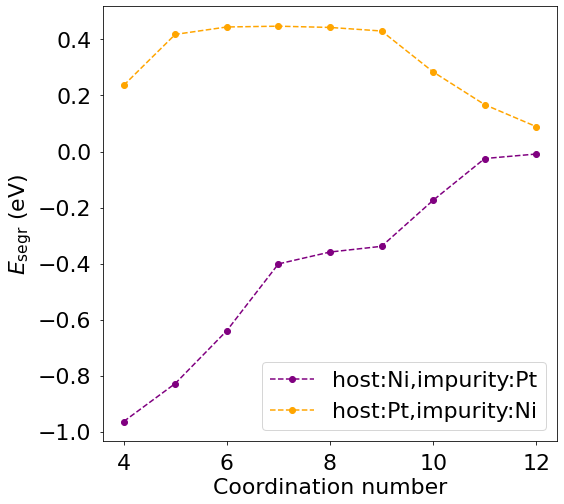

In [ ]:
plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

plt.figure(figsize=(9.7,8))
for element in [[6,22,'purple'], [22,6,'orange']]:
  CNs = [4,5,6,7,8,9,10,11,12]
  Esegr = [Esegr_direct(6,4,3,12-CN,element[0],element[1]) for CN in CNs] # host: Ni, impurity:Pt
  print(CNs, Esegr)
  plt.plot(CNs, Esegr, linestyle='dashed', marker='o', label="host:{},impurity:{}".format(elements[element[0]], elements[element[1]]), color=element[2])
plt.xlabel("Coordination number")
plt.ylabel("$\it{E}_\mathdefault{segr}$ (eV)")
# plt.ylabel("$E_{segr}$ (eV) ((643) facet)")
plt.legend()
plt.gcf().subplots_adjust(left=0.25)
plt.savefig(fname='./nanoframe_explain.png', dpi=300)

More reasonable result was obtained as shown above using the DNN model from HAIL. It would be desirable to validate using DFT calculation.

[4, 5, 6, 7, 8, 9, 10, 11, 12] [-0.9637107253074646, -0.8281809687614441, -0.6394989490509033, -0.40123414993286133, -0.35879379510879517, -0.33838915824890137, -0.17400312423706055, -0.02505572885274887, -0.008973538875579834]
[4, 5, 6, 7, 8, 9, 10, 11, 12] [0.23592723906040192, 0.4178972840309143, 0.4444306492805481, 0.4472297430038452, 0.442768394947052, 0.4300681948661804, 0.2840500473976135, 0.16716499626636505, 0.08864165842533112]
[4, 5, 6, 7, 8, 9, 10, 11, 12] [-0.6933664083480835, -0.4431194067001343, -0.3394923806190491, -0.2257567197084427, -0.17221830785274506, -0.15184254944324493, 0.00019765645265579224, 0.04683268070220947, 0.027927592396736145]
[4, 5, 6, 7, 8, 9, 10, 11, 12] [0.4432494640350342, 0.4398755431175232, 0.4305296540260315, 0.36106932163238525, 0.28751498460769653, 0.19813774526119232, 0.14986664056777954, 0.08307455480098724, 0.04382184147834778]
[4, 5, 6, 7, 8, 9, 10, 11, 12] [-1.2337193489074707, -1.0977751016616821, -0.833592414855957, -0.5827785730361938

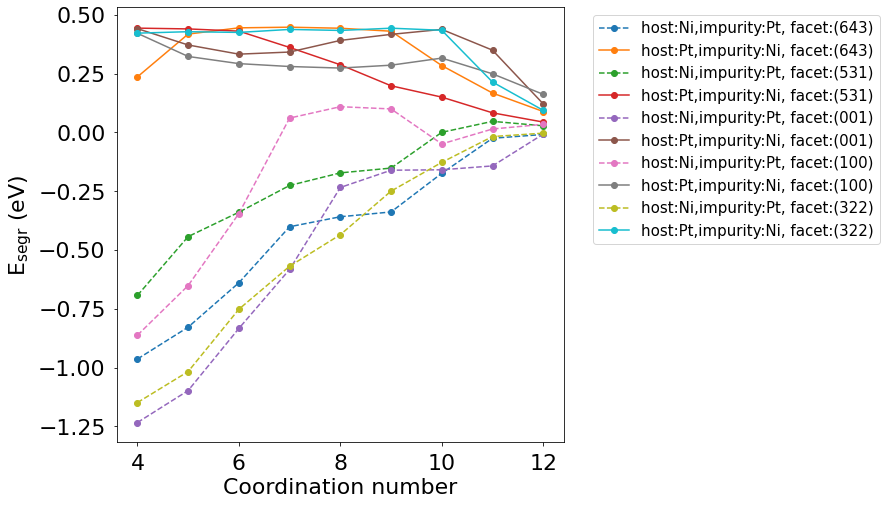

In [ ]:
plt.figure(figsize=(8,8))
for element in [[6,22,'dashed', 6,4,3], [22,6,'solid', 6,4,3],
                [6,22,'dashed', 5,3,1], [22,6,'solid', 5,3,1],
                [6,22,'dashed', 0,0,1], [22,6,'solid', 0,0,1],
                [6,22,'dashed', 1,0,0], [22,6,'solid', 1,0,0],
                [6,22,'dashed', 3,2,2], [22,6,'solid', 3,2,2]]:
  CNs = [4,5,6,7,8,9,10,11,12]
  Esegr = [Esegr_direct(element[3], element[4], element[5],12-CN,element[0],element[1]) for CN in CNs]
  print(CNs, Esegr)
  plt.plot(CNs, Esegr, linestyle=element[2], marker='o', label="host:{},impurity:{}, facet:({}{}{})".format(elements[element[0]], elements[element[1]], element[3], element[4], element[5]))
plt.xlabel("Coordination number")
plt.ylabel("$E_{segr}$ (eV)")
# plt.ylabel("$E_{segr}$ (eV) ((643) facet)")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=15)

* Reproduction of $E_{segr}$ vs. $CN$ from J. Chem. Phys., 2009, 130, 124710.

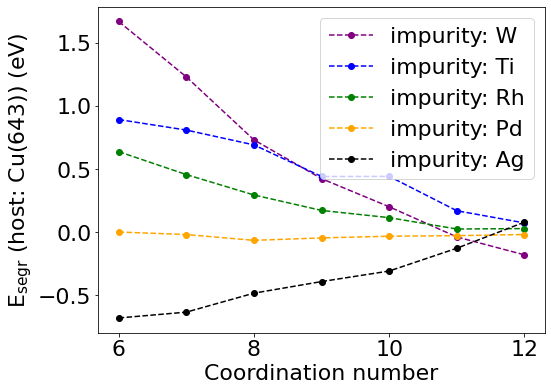

In [ ]:
plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22
plt.figure(figsize=(8,6))
for facet in [[6,4,3]]:
  for impurity in [[18,'purple'],[0,'blue'],[13,'green'],[14,'orange'],[15,'black']]:
    CNs = [6,7,8,9,10,11,12]
    Esegr = [Esegr_direct(facet[0],facet[1],facet[2],12-CN,7,impurity[0]) for CN in CNs] # host: Cu, impurity: W, Ti, Rh, Pd, Ag
    # print(CNs, Esegr)
    plt.plot(CNs, Esegr, linestyle='dashed', marker='o',
             label="impurity: {}".format(elements[impurity[0]]),
             color=impurity[1])
plt.xlabel("Coordination number")
plt.ylabel("$E_{segr}$ (host: Cu(643)) (eV)")
plt.legend()

## 4.SHAP (SHapley Additive exPlanations) Analysis

- install the package

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.1 MB/s 


## 4-1. Feature Importance Analysis using Shapley value

In [ ]:
import shap

In [ ]:
path ='/content/drive/MyDrive/CCEL/machine_learning/220413_from_HAIL/seg_test.csv'
data_set = read_csv(path, header=0)
features = list(data_set.columns)[:-1]
X_framed_test, y_framed_test = data_set.loc[:, features], data_set.loc[:, 'Esegr']

X_scaled_test = (X_framed_test-X_framed.min()) / (X_framed.max()-X_framed.min())

x_test, y_test = X_scaled_test.values, y_framed_test.values

In [ ]:
explainer = shap.DeepExplainer(model, X_scaled)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = explainer.shap_values(X)

- Summary Plot

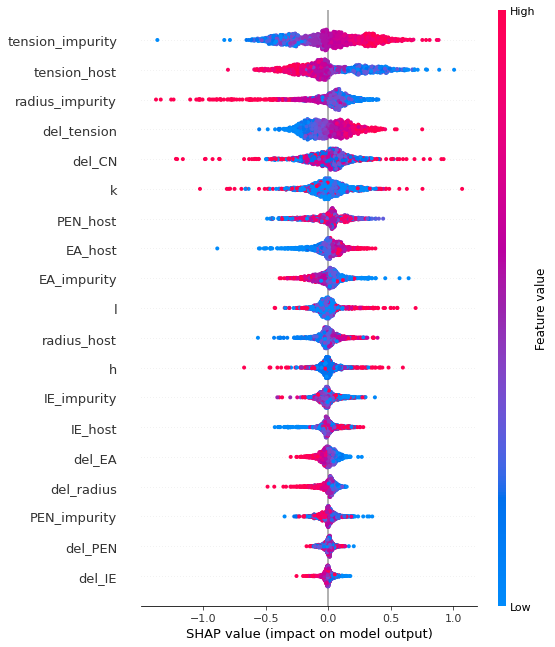

In [ ]:
shap.summary_plot(shap_values[0], X_scaled, plot_type='dot', show=False)
# shap.summary_plot(shap_values[0], X_scaled, plot_type='violin')
plt.savefig(fname='./summary_plot.png', dpi=200, bbox_inches='tight')

- Dependency on each feature

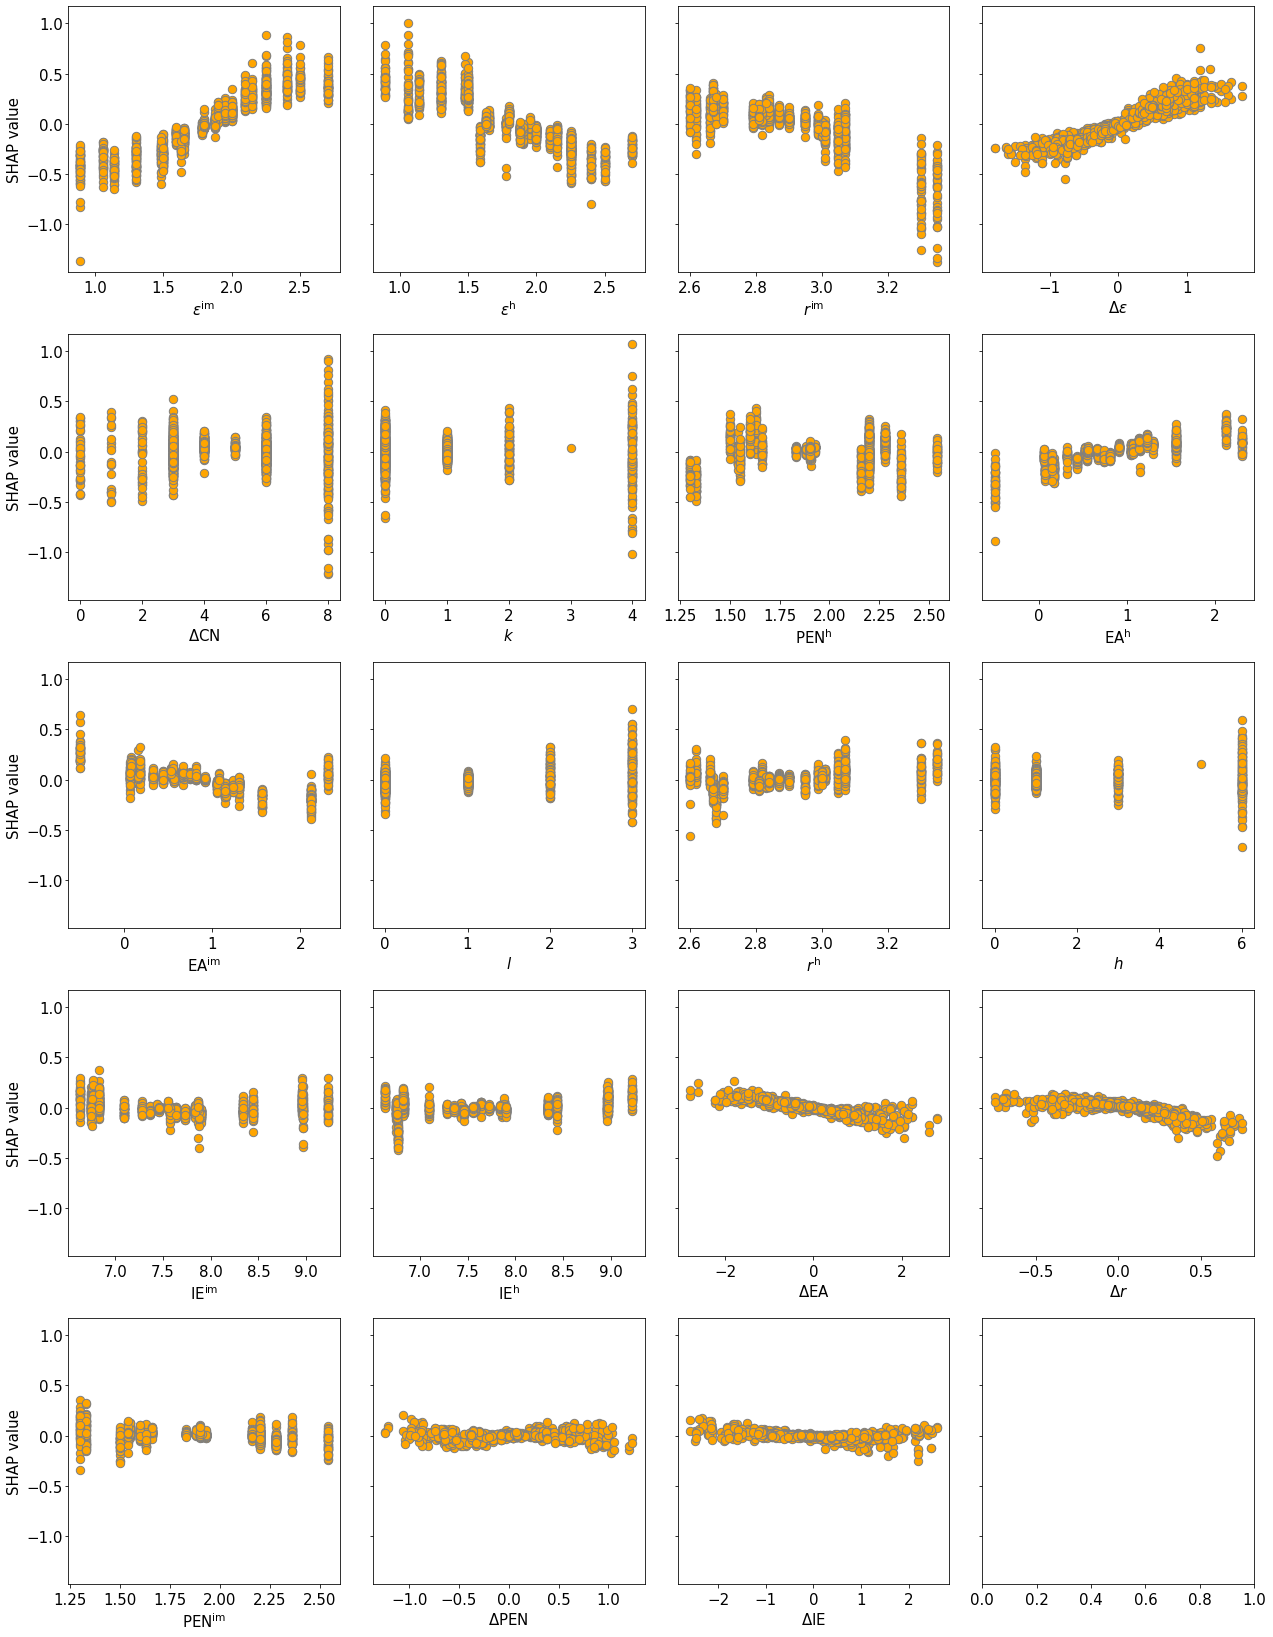

In [ ]:
plt.rcParams["mathtext.default"] = "rm" # non-italic math fonts: 'rm'
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 15
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='2'

mathtext = ['$\it{h}$','$\it{k}$','$\it{l}$','${\Delta}CN$',
            '$\it{\epsilon}^\mathdefault{h}$','$\it{\epsilon}^\mathdefault{im}$','${\Delta}\it{\epsilon}$',
            '$\it{r}^\mathdefault{h}$','$\it{r}^\mathdefault{im}$','${\Delta}\it{r}$',
            '$PEN^{h}$','$PEN^{im}$','${\Delta}PEN$',
            '$IE^{h}$','$IE^{im}$','${\Delta}IE$',
            '$EA^{h}$','$EA^{im}$','${\Delta}EA$']
features_math = [[features[i], mathtext[i]] for i in range(len(features))]

ordering_by_importance = [[5,0,0,1], [4,0,1,0], [8,0,2,0], [6,0,3,0],
                          [3,1,0,1], [1,1,1,0],[10,1,2,0],[16,1,3,0],
                          [17,2,0,1],[2,2,1,0], [7,2,2,0], [0,2,3,0],
                          [14,3,0,1],[13,3,1,0],[18,3,2,0],[9,3,3,0],
                          [11,4,0,1],[12,4,1,0],[15,4,2,0]]

min_shap = shap_values[0].min()
max_shap = shap_values[0].max()

fig, axes = plt.subplots(
    nrows=5, ncols=4,
    sharex=False, # sharing properties among x axes
    sharey=True, # sharing properties among y axes
    figsize=(18, 23))

s = 70

for index in ordering_by_importance:
  axes[index[1],index[2]].scatter(list(X_framed.loc[:,features_math[index[0]][0]]), shap_values[0][:,index[0]],
                                  c='orange', edgecolors='gray', s=s)
  axes[index[1],index[2]].set_xlabel(features_math[index[0]][1])
  if index[3]: axes[index[1],index[2]].set_ylabel('SHAP value') # ylabel only for the leftmost ones.
  # plt.xlabel(features_math[index[0]][1])
  plt.ylim((min_shap-0.1, max_shap+0.1))

fig.tight_layout()
plt.savefig(fname='./summary_subplots.png', dpi=200, bbox_inches='tight')

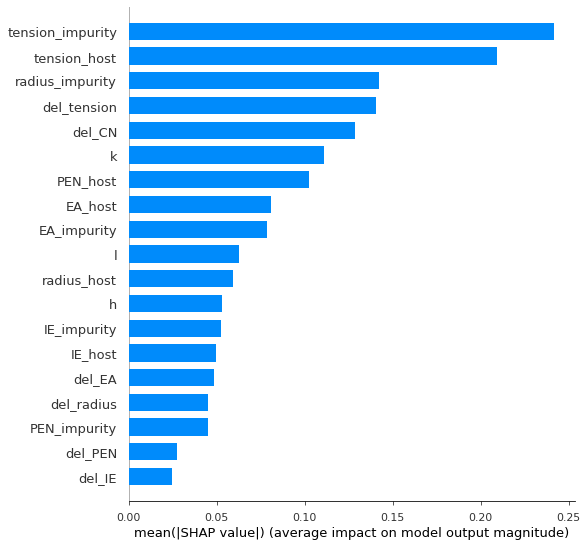

In [ ]:
shap.summary_plot(shap_values[0], X_scaled, plot_type='bar', )

- Feature Importance (polar plot)

['tension_impurity', 'tension_host', 'radius_impurity', 'del_tension', 'del_CN', 'k', 'PEN_host', 'EA_host', 'EA_impurity', 'l', 'radius_host', 'h', 'IE_impurity', 'IE_host', 'del_EA', 'del_radius', 'PEN_impurity', 'del_PEN', 'del_IE']
[0.24153880474091202, 0.20950294988526605, 0.14234091636924245, 0.14033501812087382, 0.1284119590389863, 0.11091010795047997, 0.10234038141900723, 0.08080914495733565, 0.07859760743067223, 0.06253119240921705, 0.05903479645233444, 0.053043556822479944, 0.052316006417647845, 0.04969780726530313, 0.04855247401141156, 0.045215119321220125, 0.044814689468923, 0.027188201915418115, 0.02456020440120798]


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


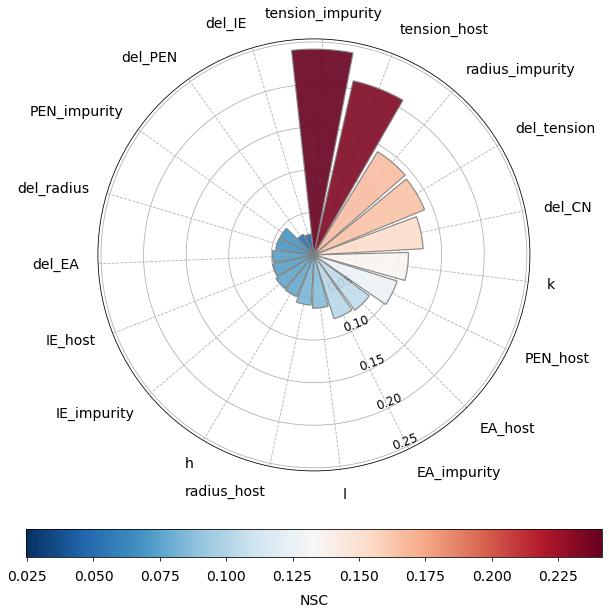

In [ ]:
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
#import IPython
from sklearn import model_selection
from sklearn import metrics

plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 14

# load data from github repository
# The data set below is without delta_dcenter feature.
path = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_11_unique.csv'
data_set = read_csv(path, header=0)
# split into input and output
features = list(data_set.columns)[:-1]

# SHAP
shap_val_abs = list(np.mean(np.absolute(shap_values[0]), axis=0))
ind_sorted = np.argsort(shap_val_abs, axis=-1)[::-1] # for sorting
shap_val_abs = list(np.sort(shap_val_abs, axis=-1)[::-1]) # for sorting

features = [features[i] for i in ind_sorted] # for sorting
print(features)
print(shap_val_abs)

def rotate(l, n):
    return l[n:] + l[:n]

def realign_polar_xticks(ax):
    for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
        theta = np.pi/2 - theta
        y, x = np.cos(theta), np.sin(theta)
        if x >= 0.1:
            label.set_horizontalalignment('left')
        if x <= -0.1:
            label.set_horizontalalignment('right')
        if y >= 0.5:
            label.set_verticalalignment('bottom')
        if y <= -0.5:
            label.set_verticalalignment('top')

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.5, 0.8, 0.8], polar=True)
# sample = np.random.uniform(low=0.5, high=13.3, size=(15,))
shap_val_abs = rotate(shap_val_abs, 7)
features = rotate(features, 7)

N = len(shap_val_abs)
theta = np.arange(0, 2*np.pi, 2*np.pi/N)
colors = [plt.cm.RdBu_r(shap_val_abs[i]/(max(shap_val_abs)-min(shap_val_abs))) for i in range(N)]
bars = ax.bar(theta, shap_val_abs, width=0.3, edgecolor='gray', color=colors, lw=1.2, alpha=0.9)

# ax.set_xticklabels(items)
plt.yticks(fontsize=12, rotation=95)
plt.xticks([2*np.pi*i/N for i in range(N)],
           features, fontsize=14)
ax.tick_params(axis = 'y', labelrotation =21)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi*3.5/2)
ax.set_axisbelow(True)
realign_polar_xticks(ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False, linestyle='--')

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap=plt.cm.RdBu_r, norm=plt.Normalize(min(shap_val_abs),max(shap_val_abs)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.1, orientation='horizontal')
cbar.set_label('NSC', rotation=0, labelpad=10, fontsize=14)
#plt.tight_layout()

plt.savefig(fname='/content/drive/MyDrive/CCEL/machine_learning/211103_images/polar_bar_NSC.png', dpi=200, bbox_inches='tight')

# 211025 Mapping $E_{segr}$ onto POSCAR

In [ ]:
#updated: 22.7.13
# from Ni Wulff construction (http://crystalium.materialsvirtuallab.org/) + ase
CNs_Ni = [7, 7, 9, 9, 6, 7, 9, 12, 9, 7, 9, 9, 7, 8, 12, 12, 8, 8, 12, 12, 7, 7, 9, 12, 9, 7, 6, 7, 12, 9, 8, 8, 12, 12, 8, 8, 12, 12, 8, 7, 12, 12, 6, 7, 9, 9, 7, 7, 12, 9, 8, 7, 12, 12, 7, 9, 9, 9, 6, 9, 7, 9, 7, 9, 6, 9, 7, 12, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 12, 9, 9, 9, 7, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 12, 7, 6, 9, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 6, 7, 9, 9, 9, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 9, 9, 9, 9, 9, 12, 9, 12, 9, 12, 12, 9, 9, 9, 7, 6, 7, 9, 7, 9, 7, 12, 8, 12, 8, 12, 8, 12, 7, 9, 7, 12, 9, 9, 9, 7, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 12, 7, 7, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 8, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 7, 9, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 7, 7, 9, 9, 9, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 9, 9, 7, 7, 8, 8, 8, 7, 7, 7, 6, 12, 7, 9, 8, 12, 8, 12, 8, 12, 8, 12, 8, 12, 7, 12, 6, 7, 9, 6, 12, 9, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 6, 7, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 7, 6, 7, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 9, 9, 6, 6, 7, 8, 8, 8, 8, 8, 7, 6, 9, 7, 12, 7, 9, 8, 12, 7, 12, 7, 9, 9, 9, 9, 12, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 9, 9, 7, 12, 9, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 7, 7, 8, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 7, 7, 9, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 7, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 9, 9, 9, 9, 7, 7, 8, 7, 7, 9, 6, 9, 7, 9, 9, 12, 9, 9, 12, 12, 9, 12, 9, 9, 9, 9, 9, 12, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 9, 9, 6, 9, 7, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 7, 9, 6, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 12, 9, 9, 7, 9, 6, 7, 6, 7, 7, 7, 8, 8, 8, 7, 7, 6, 7, 8, 8, 8, 8, 8, 7, 6, 7, 7, 8, 7, 7, 6]
# from W Wulff construction (http://crystalium.materialsvirtuallab.org/) + ase
CNs_W = [4, 4, 4, 4, 5, 6, 6, 5, 6, 5, 8, 6, 8, 5, 6, 6, 6, 8, 8, 8, 6, 6, 5, 5, 6, 6, 6, 5, 5, 4, 6, 6, 6, 6, 4, 6, 5, 8, 6, 8, 6, 8, 6, 8, 5, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 4, 5, 6, 6, 5, 6, 5, 8, 6, 8, 6, 8, 6, 8, 5, 6, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 4, 6, 5, 8, 6, 8, 5, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 4, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 4, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 6, 6, 5, 4, 6, 4, 5, 4, 4, 6, 6, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 4, 8, 4, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 5, 8, 6, 8, 6, 8, 5, 6, 5, 6, 5, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 4, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 4, 8, 6, 8, 6, 8, 6, 8, 6, 8, 4, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 5, 8, 6, 8, 6, 8, 5, 6, 5, 6, 6, 6, 5, 5, 4, 6, 4, 5, 6, 4, 8, 4, 6, 5, 6, 5]
# from Rh Wulff construction (http://crystalium.materialsvirtuallab.org/) + ase
CNs_Rh = [6, 6, 6, 8, 6, 8, 6, 8, 8, 6, 6, 6, 7, 7, 9, 7, 7, 11, 9, 7, 9, 7, 9, 12, 12, 12, 11, 12, 12, 12, 9, 7, 9, 12, 7, 7, 11, 7, 11, 12, 12, 12, 12, 12, 12, 12, 11, 7, 11, 12, 7, 9, 9, 7, 12, 9, 11, 7, 12, 11, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 11, 9, 9, 9, 9, 9, 12, 12, 12, 11, 12, 12, 12, 9, 9, 9, 12, 9, 7, 9, 7, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 7, 9, 12, 7, 7, 11, 7, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 7, 11, 12, 7, 9, 9, 9, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 9, 9, 9, 9, 7, 12, 9, 11, 7, 12, 11, 9, 9, 9, 7, 7, 6, 6, 6, 8, 6, 9, 7, 7, 9, 12, 12, 12, 11, 12, 12, 12, 9, 9, 7, 12, 7, 9, 7, 7, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 7, 12, 7, 6, 6, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 6, 6, 12, 6, 8, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 6, 8, 12, 6, 9, 9, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 6, 7, 7, 9, 9, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 7, 7, 7, 9, 6, 12, 6, 11, 6, 12, 8, 9, 7, 6, 8, 6, 8, 8, 6, 11, 7, 7, 11, 12, 12, 12, 12, 12, 12, 12, 11, 11, 7, 12, 7, 11, 7, 7, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 7, 12, 7, 8, 6, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 8, 6, 12, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 12, 6, 11, 11, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 11, 6, 7, 7, 11, 11, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 11, 7, 7, 7, 11, 8, 12, 6, 12, 8, 12, 8, 11, 7, 6, 6, 6, 9, 9, 12, 7, 9, 11, 12, 7, 11, 9, 9, 9, 9, 9, 12, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 9, 9, 6, 9, 12, 9, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 6, 7, 6, 11, 12, 11, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 11, 6, 7, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 11, 12, 9, 9, 9, 9, 9, 6, 7, 11, 6, 7, 9, 7, 7, 9, 9, 12, 7, 9, 11, 12, 7, 11, 9, 9, 9, 7, 9, 12, 9, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 7, 7, 7, 11, 12, 11, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 11, 7, 7, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 11, 12, 9, 9, 9, 9, 9, 7, 7, 11, 7, 7, 9, 7, 7, 7, 9, 12, 6, 6, 11, 12, 6, 8, 9, 7, 6, 7, 11, 12, 8, 6, 12, 12, 8, 8, 11, 7, 6, 9, 7, 6, 11, 7, 6, 9]
# from Pt Wulff construction (http://crystalium.materialsvirtuallab.org/) + ase
CNs_Pt = [6, 7, 9, 6, 7, 11, 9, 6, 9, 7, 7, 8, 12, 12, 8, 8, 12, 12, 7, 6, 9, 12, 7, 6, 11, 7, 8, 8, 12, 12, 8, 8, 12, 12, 8, 6, 11, 12, 7, 9, 7, 6, 12, 9, 8, 6, 12, 11, 7, 9, 9, 7, 7, 7, 6, 9, 7, 6, 11, 9, 9, 9, 9, 9, 12, 12, 12, 11, 12, 12, 12, 9, 9, 9, 12, 9, 7, 9, 6, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 7, 9, 12, 6, 7, 11, 6, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 7, 11, 12, 6, 9, 9, 9, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 9, 9, 9, 9, 7, 12, 9, 11, 7, 12, 11, 9, 9, 9, 6, 6, 9, 6, 7, 7, 12, 8, 12, 8, 12, 8, 12, 7, 9, 6, 12, 7, 9, 7, 6, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 7, 12, 6, 7, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 10, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 6, 10, 7, 9, 12, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 7, 6, 7, 9, 9, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 9, 7, 7, 6, 7, 10, 9, 10, 6, 7, 6, 11, 6, 7, 8, 12, 8, 12, 8, 12, 8, 12, 8, 11, 6, 12, 7, 11, 7, 6, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 7, 12, 6, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 6, 10, 8, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 10, 8, 11, 12, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 9, 6, 7, 11, 11, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 11, 7, 7, 6, 9, 6, 10, 12, 6, 10, 6, 9, 6, 9, 7, 12, 6, 9, 8, 12, 6, 11, 7, 9, 9, 9, 9, 12, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 9, 9, 7, 12, 9, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 7, 6, 8, 12, 11, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 9, 6, 7, 9, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 7, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 11, 12, 9, 9, 9, 9, 7, 6, 9, 6, 7, 7, 7, 9, 9, 12, 7, 9, 11, 12, 7, 11, 9, 9, 9, 7, 9, 12, 9, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 9, 7, 7, 7, 11, 12, 11, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 11, 7, 7, 9, 9, 9, 12, 12, 12, 9, 12, 12, 12, 11, 12, 9, 9, 9, 9, 9, 7, 7, 11, 7, 7, 9, 6, 6, 6, 7, 10, 9, 10, 6, 7, 6, 6, 9, 10, 6, 12, 10, 6, 6, 9, 6, 7, 6, 9, 6, 7]
# from octahedron POSCAR
# CNs = [7, 7, 4, 7, 7, 7, 9, 9, 9, 7, 9, 9, 12, 9, 7, 7, 9, 12, 9, 12, 9, 12, 12, 7, 7, 9, 9, 7, 9, 7, 7, 9, 9, 9, 7, 9, 9, 12, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 12, 9, 7, 7, 9, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 7, 7, 9, 9, 9, 9, 12, 9, 12, 9, 12, 12, 9, 9, 9, 9, 7, 9, 7, 7, 4, 7, 7, 7, 7, 12, 9, 9, 12, 12, 9, 12, 7, 7, 9, 7, 7, 12, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 9, 12, 7, 7, 9, 4, 7, 7, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 7, 9, 4, 7, 7, 9, 12, 12, 12, 9, 12, 12, 12, 12, 12, 7, 9, 9, 7, 7, 7, 9, 12, 7, 9, 7, 7, 4, 9, 7, 9, 7, 9, 9, 12, 9, 9, 12, 12, 9, 12, 9, 9, 9, 7, 9, 7, 12, 12, 12, 9, 12, 12, 12, 12, 12, 9, 7, 9, 7, 9, 9, 9, 12, 9, 9, 7, 9, 7, 9, 7, 9, 7, 7, 9, 7, 12, 9, 7, 7, 7, 7, 4]

from tqdm import tqdm # for progress bar

Esegrs_Ni = [Esegr_direct(h=6, k=4, l=3, del_CN=12-CN, num_host=6, num_impurity=22) for CN in tqdm(CNs_Ni,desc='Ni')] # host: Ni, impurity: Pt
Esegrs_W = [Esegr_direct(h=6, k=4, l=3, del_CN=12-CN, num_host=18, num_impurity=22) for CN in tqdm(CNs_W,desc='W')] # host: W, impurity: Pt
Esegrs_Rh = [Esegr_direct(h=6, k=4, l=3, del_CN=12-CN, num_host=13, num_impurity=22) for CN in tqdm(CNs_Rh,desc='Rh')] # host: Rh, impurity: Pt
Esegrs_Pt = [Esegr_direct(h=6, k=4, l=3, del_CN=12-CN, num_host=22, num_impurity=6) for CN in tqdm(CNs_Pt,desc='Pt')] # host: Pt, impurity: Ni

W: 100%|██████████| 665/665 [00:22<00:00, 29.63it/s]


In [ ]:
print(Esegrs_Ni)
print(Esegrs_W)
print(Esegrs_Rh)
print(Esegrs_Pt)

[-2.1536834239959717, -2.1536834239959717, -2.1536834239959717, -2.1536834239959717, -2.1045074462890625, -1.3611595630645752, -1.3611595630645752, -2.1045074462890625, -1.3611595630645752, -2.1045074462890625, -0.9278042316436768, -1.3611595630645752, -0.9278042316436768, -2.1045074462890625, -1.3611595630645752, -1.3611595630645752, -1.3611595630645752, -0.9278042316436768, -0.9278042316436768, -0.9278042316436768, -1.3611595630645752, -1.3611595630645752, -2.1045074462890625, -2.1045074462890625, -1.3611595630645752, -1.3611595630645752, -1.3611595630645752, -2.1045074462890625, -2.1045074462890625, -2.1536834239959717, -1.3611595630645752, -1.3611595630645752, -1.3611595630645752, -1.3611595630645752, -2.1536834239959717, -1.3611595630645752, -2.1045074462890625, -0.9278042316436768, -1.3611595630645752, -0.9278042316436768, -1.3611595630645752, -0.9278042316436768, -1.3611595630645752, -0.9278042316436768, -2.1045074462890625, -1.3611595630645752, -1.3611595630645752, -1.361159563

In [ ]:
Esegr_tot = []
for element in [[6,0], [6,1], [6,2], [6,3], [6,4], [6,5], [6,6], [6,7], [6,8], [6,9], [6,10],
                 [6,11], [6,12], [6,13], [6,14], [6,15], [6,16], [6,17], [6,18], [6,19], [6,20],
                 [6,21], [6,22], [6,23],]:
  CNs = [4,5,6,7,8,9,10,11,12]
  Esegr = [Esegr_direct(6,4,3,12-CN,element[0],element[1]) for CN in CNs] # host: Ni, impurity:Pt
  Esegr_tot = Esegr_tot+Esegr

In [ ]:
# norm = np.max(Esegr_tot)-np.min(Esegr_tot)
# min = np.min(Esegr_tot)

In [ ]:
# all_combination = [[i,j] for i in range(24) for j in range(24)]
all_combination = [[15,23],[5,22],[6,22]]

In [ ]:
plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22
plt.figure(figsize=(8,8))
# cmap = plt.get_cmap('Spectral')

Esegr_tot = []
# for element in all_combination:
for element in [[0,22],[1,22],[2,22],[3,22],[4,22],[5,22],[6,22],[7,22],[8,22],[9,22],
                [10,22],[11,22],[12,22],[13,22],[14,22],[15,22],[16,22],[17,22],[18,22],[19,22],
                [20,22],[21,22],[22,22],[23,22],]:
  CNs = [4,5,6,7,8,9,10,11,12]
  Esegr = [Esegr_direct(6,4,3,12-CN,element[0],element[1]) for CN in CNs] # host: Ni, impurity:Pt
  # if Esegr[8]<0.13 and Esegr[0]<Esegr[1]<Esegr[2]<Esegr[3]<Esegr[4]<Esegr[5]<Esegr[6]<Esegr[7]<Esegr[8]:
  print("host:{},impurity:{}".format(elements[element[0]], elements[element[1]]), Esegr)
    # plt.plot(CNs, Esegr, linestyle='dashed', marker='o', label="host:{},impurity:{}".format(elements[element[0]], elements[element[1]]))#, color=cmap(Esegr[0]))

plt.xlabel("Coordination number")
plt.ylabel("$\it{E}_\mathdefault{segr}$ (eV)")
# plt.ylabel("$E_{segr}$ (eV) ((643) facet)")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=15)
plt.gcf().subplots_adjust(right=0.5)
plt.savefig(fname='./screening.png', dpi=300)

## 1.Heatmap for screening

---



In [ ]:
from tqdm import tqdm
import seaborn as sns

In [ ]:
def find_index(str_list, target_string):
  return [i for i, string in enumerate(str_list) if string==target_string][0]

# e.g., find_index(elements, 'Pt')

# Judge whether a combination satisfies the screening condition
def is_cond_satisfied(num_host, num_impurity):
  CNs = [4,5,6,7,8,9,10,11,12]
  Esegr = [Esegr_direct(6,4,3,12-CN, num_host, num_impurity) for CN in CNs] # host: Ni, impurity:Pt
  if Esegr[8]<0.13 and Esegr[0]<Esegr[1]<Esegr[2]<Esegr[3]<Esegr[4]<Esegr[5]<Esegr[6]<Esegr[7]<Esegr[8]:
    result = True
  else:
    result = False
  return result

# e.g., is_cond_satisfied(7,22)

def Esegr_643_diff(CN_final, CN_init, num_host, num_impurity):
  final = Esegr_direct(6,4,3,12-CN_final,num_host,num_impurity)
  init  = Esegr_direct(6,4,3, 12-CN_init,num_host,num_impurity)
  return final - init

# e.g., Esegr_643_diff(4,12,6,22)

In [ ]:
Esegr_643_diff(4,12,6,22)
# Esegr_direct(6,4,3,12,6,22)

-0.9547371864318848

In [ ]:
# Dictionary to make the DataFrame with Esegr_diff values as elements
list_of_dict = [dict(zip(elements, [Esegr_643_diff(4,12,num_host    =find_index(elements, host),
                                                        num_impurity=find_index(elements, impurity)) for host in elements])) for impurity in tqdm(elements,
                                                                                                                                                  desc='cal E_diff')]
Esegr_diff_pair = dict(zip(elements, list_of_dict))

# masking for the elements that did not survived the screening condition
list_of_dict2 = [dict(zip(elements, [not (is_cond_satisfied(num_host    =find_index(elements, host),
                                                            num_impurity=find_index(elements, impurity))) for host in elements])) for impurity in tqdm(elements,
                                                                                                                                                       desc='mask nt survd')]
Esegr_mask = dict(zip(elements, list_of_dict2))

for element1 in elements:
  for element2 in elements:
    if element1 is element2:
      # Mask diagonal elements
      Esegr_mask[element1][element2] = True
    # else:
    #   Esegr_mask[element1][element2] = False

# DataFrame(Esegr_mask).head()

mask nt survd: 100%|██████████| 24/24 [02:22<00:00,  5.95s/it]


In [ ]:
# masking for diagonal elements
list_of_dict3 = [dict(zip(elements, [0 for host in elements])) for impurity in tqdm(elements)]
Esegr_mask_diagonal = dict(zip(elements, list_of_dict3))

for element1 in elements:
  for element2 in elements:
    if element1 is element2:
      # Mask diagonal elements
      Esegr_mask_diagonal[element1][element2] = True

100%|██████████| 24/24 [00:00<00:00, 102092.59it/s]


In [ ]:
DataFrame(Esegr_diff_pair).loc[:,'Pt']

Ti    0.054886
V    -0.018101
Cr   -0.539019
Mn   -0.051523
Fe   -0.353174
Co   -0.946433
Ni   -0.954737
Cu    0.383152
Zr    0.043584
Nb   -0.208824
Mo   -1.734454
Tc   -0.671465
Ru   -1.382091
Rh   -0.637748
Pd   -0.453173
Ag   -0.016274
Hf    0.156286
Ta   -0.222186
W    -2.027211
Re   -0.239883
Os   -0.942491
Ir   -0.941273
Pt   -0.517020
Au    0.093784
Name: Pt, dtype: float64

In [ ]:
DataFrame(Esegr_mask)

,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zr,Nb,...,Pd,Ag,Hf,Ta,W,Re,Os,Ir,Pt,Au
Ti,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
V,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Cr,True,True,True,True,True,True,True,False,True,True,...,True,False,True,True,True,True,True,True,True,True
Mn,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Fe,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
Co,True,True,True,True,True,True,True,False,True,True,...,False,False,True,True,True,True,True,True,False,False
Ni,True,True,True,True,True,True,True,False,True,True,...,True,False,True,True,True,True,True,True,False,False
Cu,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Zr,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Nb,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


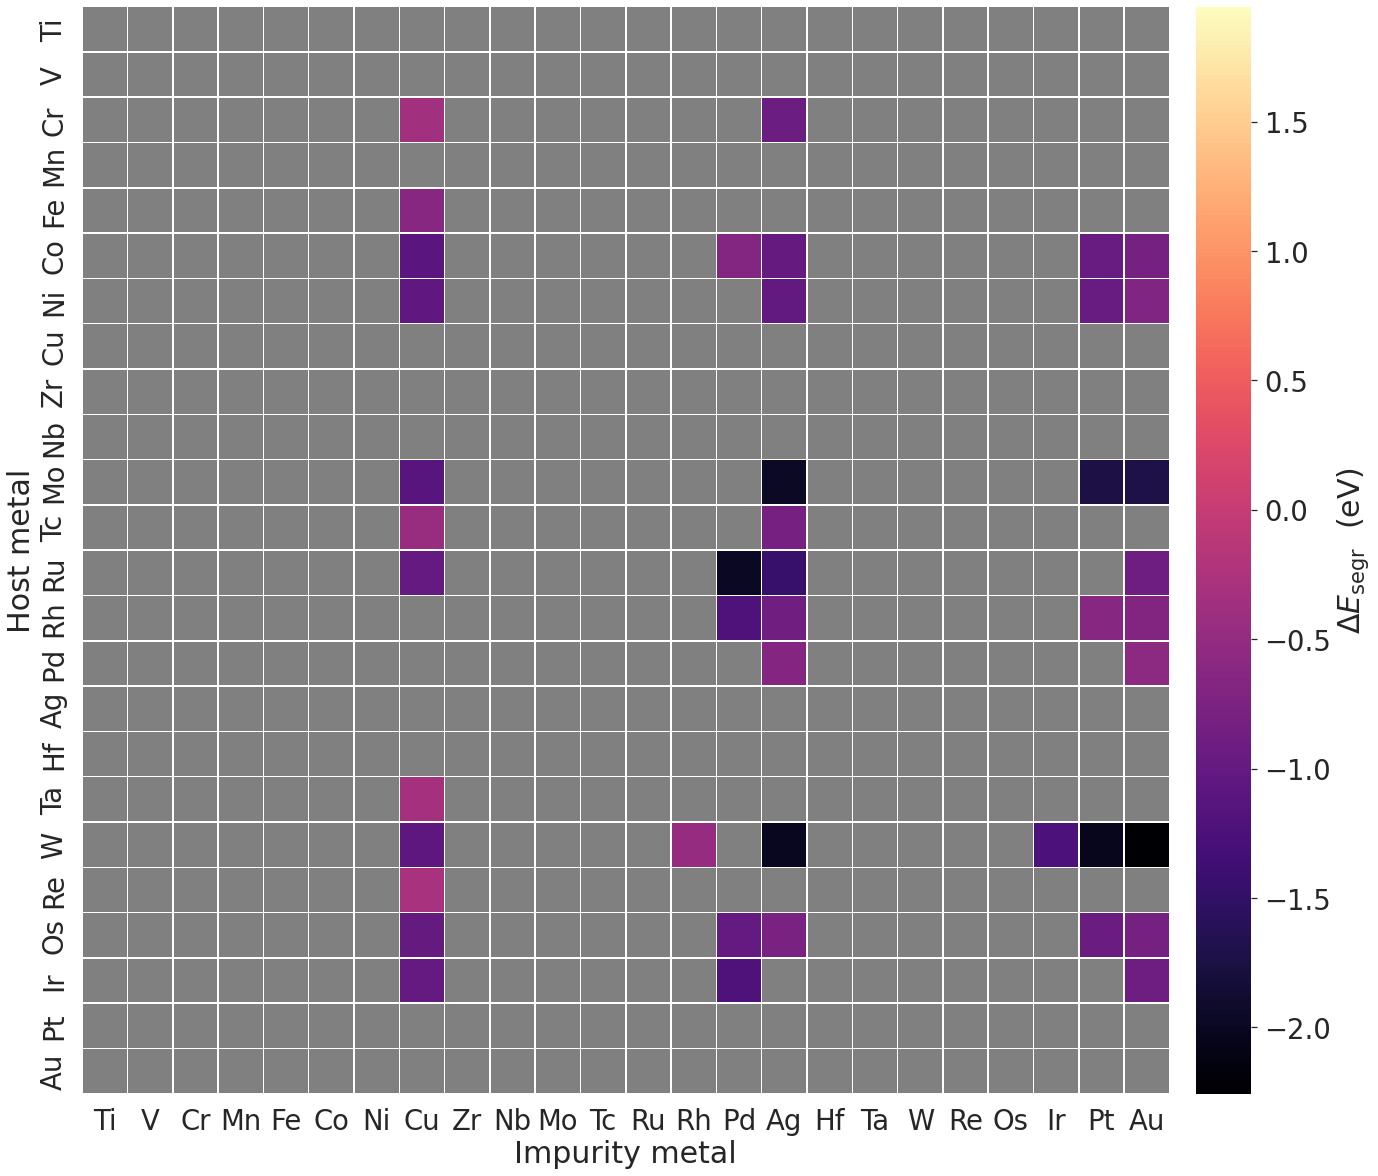

In [ ]:
max = DataFrame(Esegr_diff_pair).values.max()
min = DataFrame(Esegr_diff_pair).values.min()

plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22

sns.set(font_scale=2.5, font='sans-serif',)#, palette=sns.color_palette('Pastel1'))
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(24, 20))
heatmap = sns.heatmap(DataFrame(Esegr_diff_pair), annot=False, fmt="1.2f",
                      linewidths=.5, ax=ax, cmap='Reds',square=True,
                      mask=DataFrame(Esegr_mask),
                      vmin=min, vmax=max, cbar_kws={'label': '$\Delta\it{E}_\mathdefault{segr}$  (eV)', 'pad': 0.02})
# label: '$\it{E}_\mathdefault{segr}^\mathdefault{CN=4}-\it{E}_\mathdefault{segr}^\mathdefault{CN=12}$  (eV)'
# cmap: 'bwr_r'

heatmap.set_xlabel('Impurity metal')
heatmap.set_ylabel('Host metal')
heatmap.set_facecolor('gray')


# plt.savefig(fname='./screening_host.png', dpi=300)
# plt.savefig(fname='./screening_host_unmasked.png', dpi=300)

Esegr vs. CN for survived combinations

host:Co,impurity:Au [-1.063543438911438, -0.9216840267181396, -0.804918646812439, -0.7275394201278687, -0.6507943868637085, -0.6068534851074219, -0.50627601146698, -0.4499529004096985, -0.23847700655460358]
host:Ni,impurity:Au [-0.9342617392539978, -0.7727728486061096, -0.7358680367469788, -0.6990252733230591, -0.6703668236732483, -0.5969810485839844, -0.5072014927864075, -0.38829392194747925, -0.2214120477437973]
host:Mo,impurity:Au [-1.9152897596359253, -1.2701553106307983, -1.1525551080703735, -1.08407461643219, -0.7624809145927429, -0.436881959438324, -0.3615682125091553, -0.27496063709259033, -0.1846076399087906]
host:Ru,impurity:Au [-1.175365686416626, -1.0910240411758423, -0.9572003483772278, -0.8404009938240051, -0.7457813024520874, -0.648873507976532, -0.5813840627670288, -0.3940110206604004, -0.2952289283275604]
host:Rh,impurity:Au [-0.8918142318725586, -0.8216837048530579, -0.7933403253555298, -0.7122215032577515, -0.6290251612663269, -0.5896313786506653, -0.4577779173851013

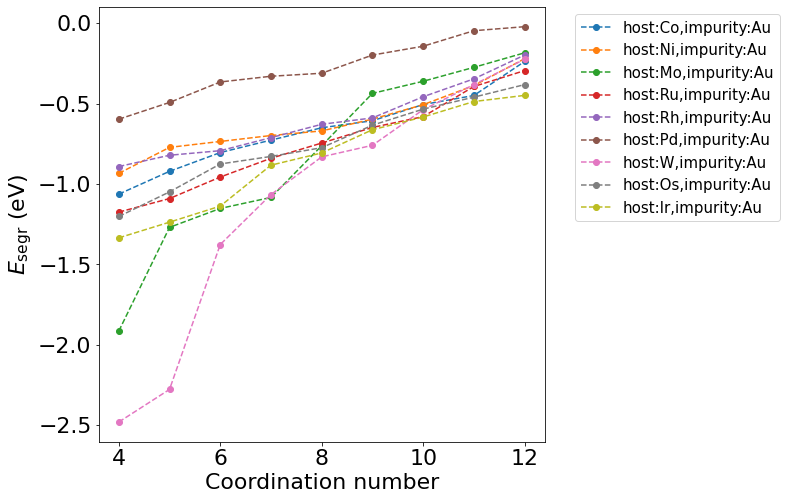

In [ ]:
plt.rcParams["mathtext.default"] = "regular" # non-italic math fonts
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22
plt.figure(figsize=(8,8))
# cmap = plt.get_cmap('Spectral')

CNs = [4,5,6,7,8,9,10,11,12]
impurity = 'Au'

for num_host in range(len(elements)):
  for num_impurity in [find_index(elements, impurity)]: #range(len(elements)):
    if num_host == num_impurity: continue
    elif is_cond_satisfied(num_host, num_impurity):
      Esegr = [Esegr_direct(6,4,3,12-CN, num_host, num_impurity) for CN in CNs]
      print("host:{},impurity:{}".format(elements[num_host], elements[num_impurity]), Esegr)
      plt.plot(CNs, Esegr, linestyle='dashed', marker='o', label="host:{},impurity:{}".format(elements[num_host], elements[num_impurity]))#, color=cmap(Esegr[0]))

plt.xlabel("Coordination number")
plt.ylabel("$\it{E}_\mathdefault{segr}$ (eV)")
# plt.ylabel("$E_{segr}$ (eV) ((643) facet)")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=15)
# plt.gcf().subplots_adjust(right=0.5)
plt.savefig(fname='./screening_{}.png'.format(impurity), dpi=300, bbox_inches='tight')